In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# 1- EXPLORING DATA

In [185]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [186]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [188]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [189]:
nc=train_df.isnull().sum()
nc[nc > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

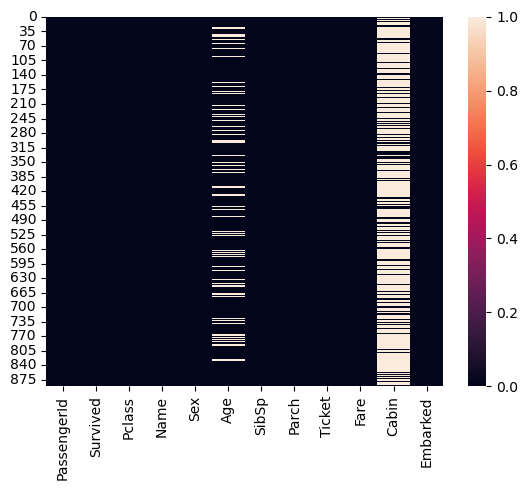

In [190]:
sns.heatmap(train_df.isnull())


# 2-Cleaning Data

In [191]:
# delete columns
def clean(df):
    df.drop(['Cabin' , 'Name' , 'Ticket' , 'Embarked' , 'Fare'] , axis=1 , inplace=True)
    df['Age']=df['Age'].fillna(df['Age'].median())
    df.dropna()

In [192]:
clean(train_df)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [193]:
clean(test_df)

<Axes: >

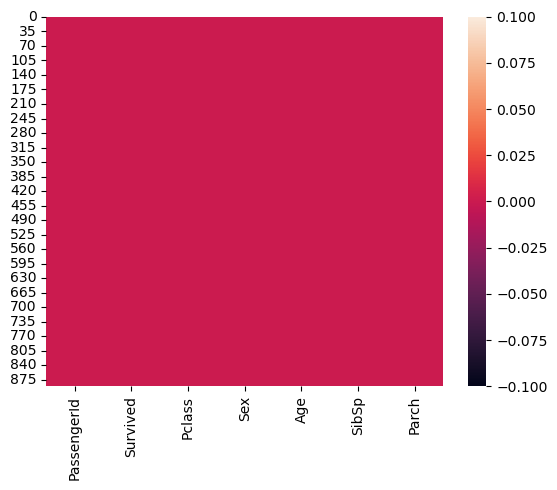

In [194]:
sns.heatmap(train_df.isnull())

# 3-Analysis

<Axes: >

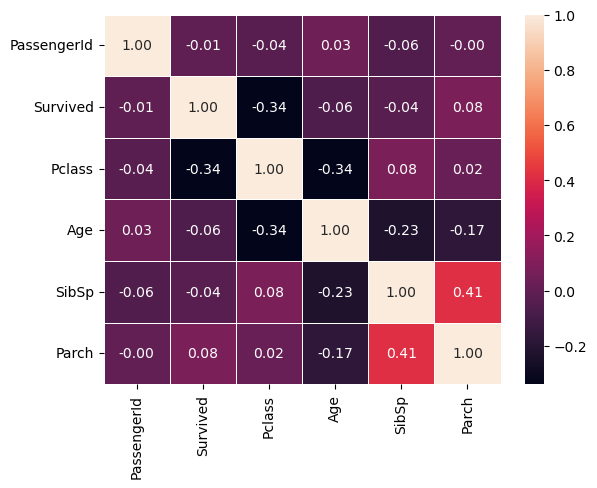

In [195]:
cor = train_df.corr(numeric_only=True)
sns.heatmap(cor , annot=True , fmt=".2f" , linewidths=0.5)

<Axes: ylabel='count'>

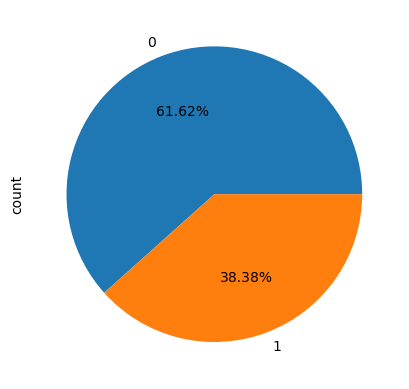

In [196]:
train_df['Survived'].value_counts().plot.pie(autopct="%0.2f%%")

<Axes: xlabel='Sex', ylabel='count'>

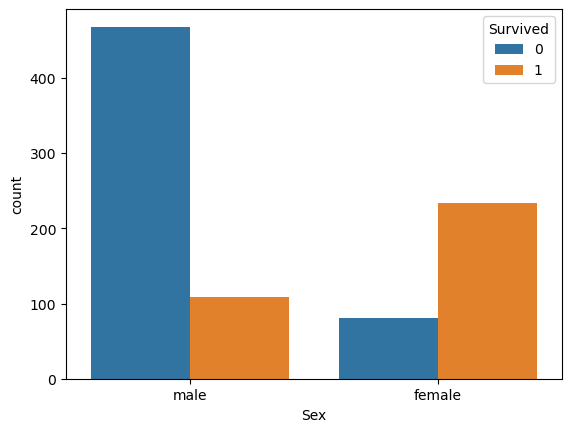

In [197]:
sns.countplot(data=train_df,x='Sex',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

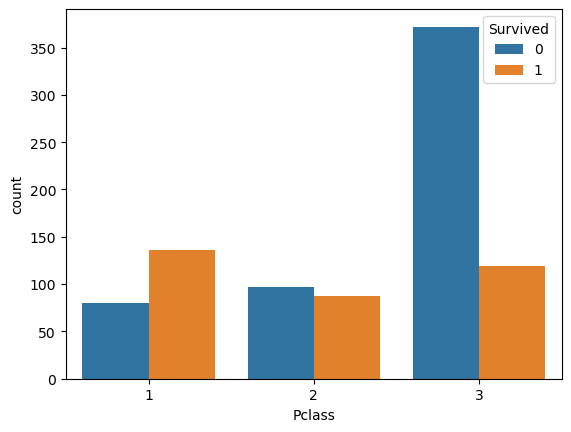

In [198]:
sns.countplot(data=train_df , x='Pclass' , hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

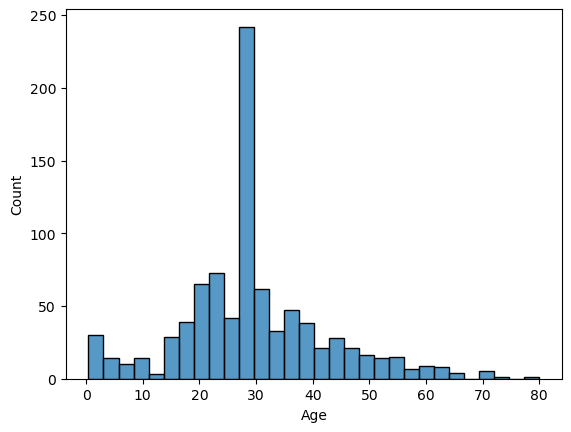

In [199]:
sns.histplot(train_df['Age'])

# 4-Get Data Ready For ML

In [200]:
train_df['Sex'] = pd.get_dummies(train_df['Sex'] , drop_first=True)
train_df['Sex'] = train_df['Sex'].map({
    False:0 , True:1
}).astype('uint8')
test_df['Sex'] = pd.get_dummies(test_df['Sex'] , drop_first=True)
test_df['Sex'] = test_df['Sex'].map({
    False:0 , True:1
}).astype('uint8')

train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,28.0,1,2
889,890,1,1,1,26.0,0,0


In [201]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    uint8  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), uint8(1)
memory usage: 42.8 KB


In [202]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.0,1,0
1,2,1,1,0,38.0,1,0
2,3,1,3,0,26.0,0,0
3,4,1,1,0,35.0,1,0
4,5,0,3,1,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0
887,888,1,1,0,19.0,0,0
888,889,0,3,0,28.0,1,2
889,890,1,1,1,26.0,0,0


# 5-Model

In [203]:
x=train_df.drop('Survived' , axis=1)
y=train_df['Survived']

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80)

In [205]:
def validateModel(model):
    model.fit(x_train , y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(pred , y_test)
    print('Accuracy = ' , acc)

In [206]:
model_LR = LogisticRegression()
validateModel(model_LR)

Accuracy =  0.776536312849162


/home/zedan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [207]:
model_RF = RandomForestClassifier()
validateModel(model_RF)

Accuracy =  0.7877094972067039


In [208]:
model_GBC = GradientBoostingClassifier()
validateModel(model_GBC)

Accuracy =  0.8044692737430168


In [209]:
model_DTC = DecisionTreeClassifier()
validateModel(model_DTC)

Accuracy =  0.7039106145251397


In [210]:
model_KNC = KNeighborsClassifier()
validateModel(model_KNC)

Accuracy =  0.5027932960893855


In [211]:
model_SVM = SVC()
validateModel(model_SVM)

Accuracy =  0.5642458100558659


In [213]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [216]:
pred=model.predict(test_df)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [220]:
result=pd.DataFrame({
    "PassengerId":test_df['PassengerId'],
    "Survived":pred
})
result

In [221]:
result.to_csv('submission.csv' , index=False)